In [1]:
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
from matplotlib import pyplot as plt
from matplotlib.transforms import offset_copy
%matplotlib inline

## Enter your location

In [43]:
my_lat = 41.00 
my_lon = -73.91

Saba is the nearest volcano at 2792 km (1735 mi)


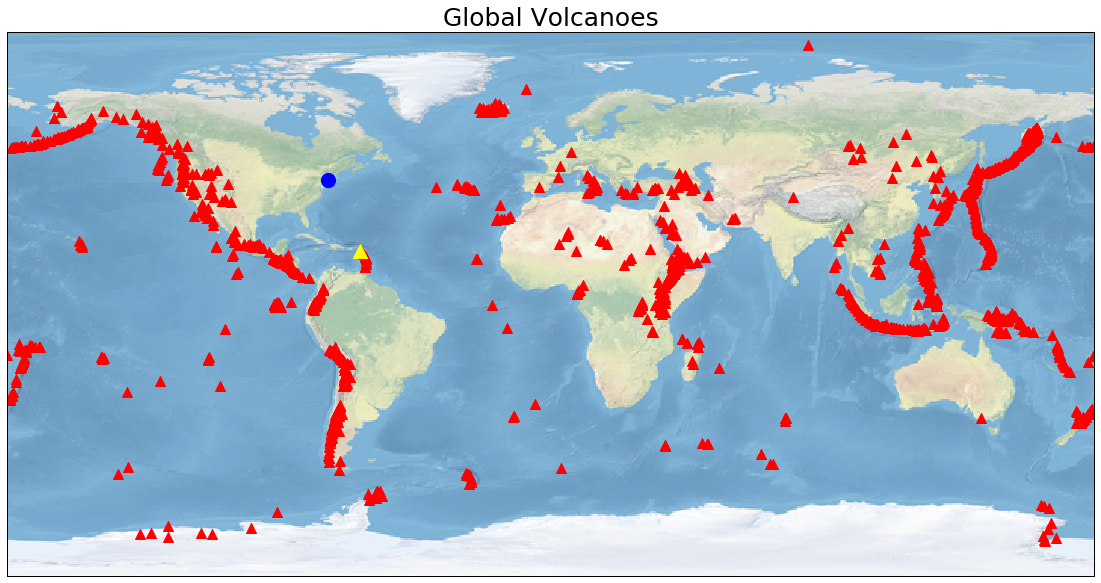

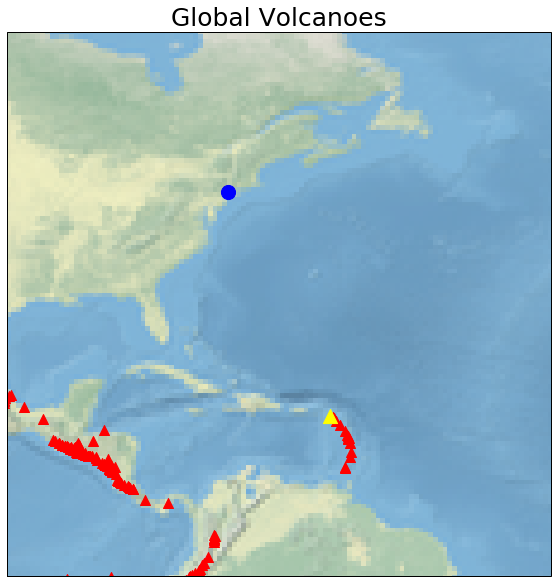

In [44]:
volcanoes = pd.read_csv('GVP_Volcano_List_Holocene.csv',header=1)

def sind(theta):
    return(np.sin(np.deg2rad(theta)))
def cosd(theta):
    return(np.cos(np.deg2rad(theta)))

r = 6370 # Earth's radius in km
dist = r*np.arccos(sind(my_lat)*sind(volcanoes.Latitude)+
                   cosd(my_lat)*cosd(volcanoes.Latitude)*cosd(volcanoes.Longitude-my_lon))


print(volcanoes['Volcano Name'][dist.idxmin()] + ' is the nearest volcano at ' +  '{0:.4g}'.format(dist.min()) + ' km ('
     +  '{0:.4g}'.format(dist.min()*0.621371) + ' mi)')

closest_lat = volcanoes.Latitude[dist.idxmin()]
closest_lon = volcanoes.Longitude[dist.idxmin()]
dlat = np.abs(my_lat - closest_lat)
dlon = np.abs(my_lon - closest_lon)
dextent = np.max([dlat,dlon])+5

plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.scatter(x=volcanoes.Longitude,y=volcanoes.Latitude,transform=ccrs.PlateCarree(),c='red',marker='^',s=100)
plt.scatter(x=closest_lon,y=closest_lat,transform=ccrs.PlateCarree(),c='yellow',marker='^',s=200)
plt.scatter(x=my_lon, y=my_lat,transform=ccrs.PlateCarree(),c='blue',s=200)
ax.set_title('Global Volcanoes',fontsize=25);

plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.scatter(x=volcanoes.Longitude,y=volcanoes.Latitude,transform=ccrs.PlateCarree(),c='red',marker='^',s=100)
plt.scatter(x=closest_lon,y=closest_lat,transform=ccrs.PlateCarree(),c='yellow',marker='^',s=200)
plt.scatter(x=my_lon, y=my_lat,transform=ccrs.PlateCarree(),c='blue',s=200)
ax.set_extent([np.mean([my_lon,closest_lon])-dextent, np.mean([my_lon,closest_lon])+dextent,
               np.mean([my_lat,closest_lat])-dextent, np.mean([my_lat,closest_lat])+dextent],
               crs=ccrs.PlateCarree())
ax.set_title('Global Volcanoes',fontsize=25);